In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [17]:
data = pd.read_excel("clean_data.xlsx")
data.head(5)

,Fulfilment,ship-service-level,Category,Courier Status,Qty,ship-city,ship-state,DayOfWeek,Month,Year,...,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,Status_Shipped - Picked Up,Status_Shipped - Rejected by Buyer,Status_Shipped - Returned to Seller,Status_Shipped - Returning to Seller,Status_Shipping,Amount_scaled
0,1,1,5,1,0,4795,28,5,4,2022,...,0,0,0,0,0,0,0,0,0,-0.054807
1,1,1,8,1,1,776,23,5,4,2022,...,0,1,0,0,0,0,0,0,0,-0.977872
2,0,0,8,1,1,5353,28,5,4,2022,...,0,0,0,0,0,0,0,0,0,-1.272037
3,1,1,7,1,0,6140,43,5,4,2022,...,0,0,0,0,0,0,0,0,0,0.349038
4,0,0,6,1,1,1466,56,5,4,2022,...,0,0,0,0,0,0,0,0,0,-0.336059


In [23]:
X = data.drop(columns=["Amount_scaled"])
y = data["Amount_scaled"]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, verbosity=0)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))
    print(f"{name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")


    comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    print(comparison_df.head(), "\n")


Linear Regression
RMSE: 0.8586
R² Score: 0.2481

          Actual  Predicted
86376  -0.125942   0.556785
50927  -1.356084  -0.478772
108820  1.814780   0.529704
42366  -0.138510  -0.724921
100350 -0.569098   0.224140 

Ridge Regression
RMSE: 0.8586
R² Score: 0.2481

          Actual  Predicted
86376  -0.125942   0.556806
50927  -1.356084  -0.478716
108820  1.814780   0.529651
42366  -0.138510  -0.726197
100350 -0.569098   0.224098 

Lasso Regression
RMSE: 0.9902
R² Score: 0.0001

          Actual  Predicted
86376  -0.125942   0.001814
50927  -1.356084   0.003670
108820  1.814780  -0.007810
42366  -0.138510   0.011675
100350 -0.569098   0.004922 

Decision Tree
RMSE: 0.8843
R² Score: 0.2026

          Actual  Predicted
86376  -0.125942   1.914108
50927  -1.356084  -0.514945
108820  1.814780   0.895993
42366  -0.138510  -0.964604
100350 -0.569098   0.243356 

Random Forest
RMSE: 0.7698
R² Score: 0.3956

          Actual  Predicted
86376  -0.125942   1.381383
50927  -1.356084  -0.494342
1

In [27]:
best_model = min(results, key=lambda x: x[1])
print(f"Best Model: {best_model[0]} with RMSE = {best_model[1]:.4f}, R² = {best_model[2]:.4f}")

Best Model: XGBoost with RMSE = 0.7214, R² = 0.4692


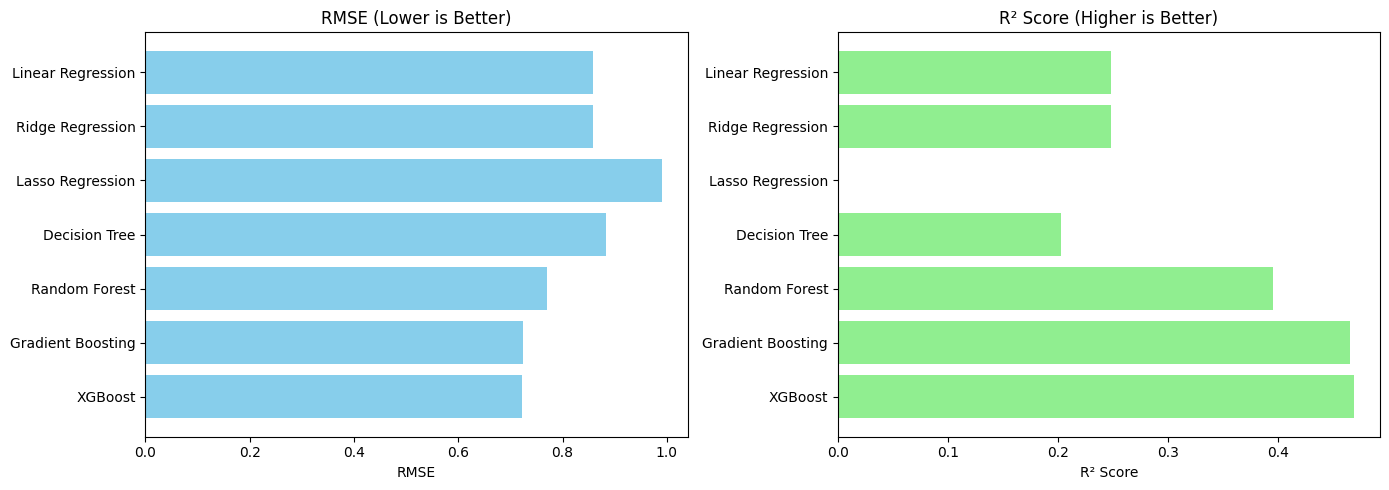

In [28]:

model_names = [name for name, rmse, r2 in results]
rmse_scores = [rmse for name, rmse, r2 in results]
r2_scores = [r2 for name, rmse, r2 in results]


plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.barh(model_names, rmse_scores, color='skyblue')
plt.title("RMSE (Lower is Better)")
plt.xlabel("RMSE")
plt.gca().invert_yaxis()


plt.subplot(1, 2, 2)
plt.barh(model_names, r2_scores, color='lightgreen')
plt.title("R² Score (Higher is Better)")
plt.xlabel("R² Score")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
